# Test on 1-h precipitation reading and daily 12-12UTC accumulation

This notebook is for internal testing only. Several tests have been done in order to envisage an optimal strategy to perform the hourly precipitation accumulation required for FWI.

In [1]:
## Expand JVM memory
options(java.parameters = "-Xmx8000m")

## Internal helpers
source("../R/helpers.R")

## Climate4R
library(loadeR)
library(convertR)


Using Python from climate4R conda environment: /mnt/CORDEX_CMIP6_tmp/user_tmp/jbediajimenez/conda_envs/climate4R/bin/python 


Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Loading required package: rJava

Loading required package: loadeR.java

Java version 11x amd64 by Azul Systems, Inc. detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.

Loading required package: udunits2

udunits system database read from /mnt/CORDEX_CMIP6_tmp/user_tmp/jbediajimenez/conda_envs/climate4R/share/udunits/udunits2.xml

convertR version 0.2.1 (2023-06-

## Check model availability

[1] "CLMcom-CMCC_CCLM6-0-1-URB"         "CLMcom-Hereon_CCLM6-0-1"          
 [3] "CLMcom-Hereon_ICON-CLM-202407-1-1" "CNRM-MF_CNRM-ALADIN64E1"          
 [5] "DWD-BSH_ROAM-NBS"                  "GERICS_REMO2020-2-2-iMOVE"        
 [7] "GERICS_REMO2020-2-2-iMOVE-LUC"     "HCLIMcom-SMHI_HCLIM43-ALADIN"     
 [9] "ICTP_RegCM5-0"                     "IDL-FCUL_WRF451Q"                 
[11] "RMIB-UGent_ALARO1-SFX"

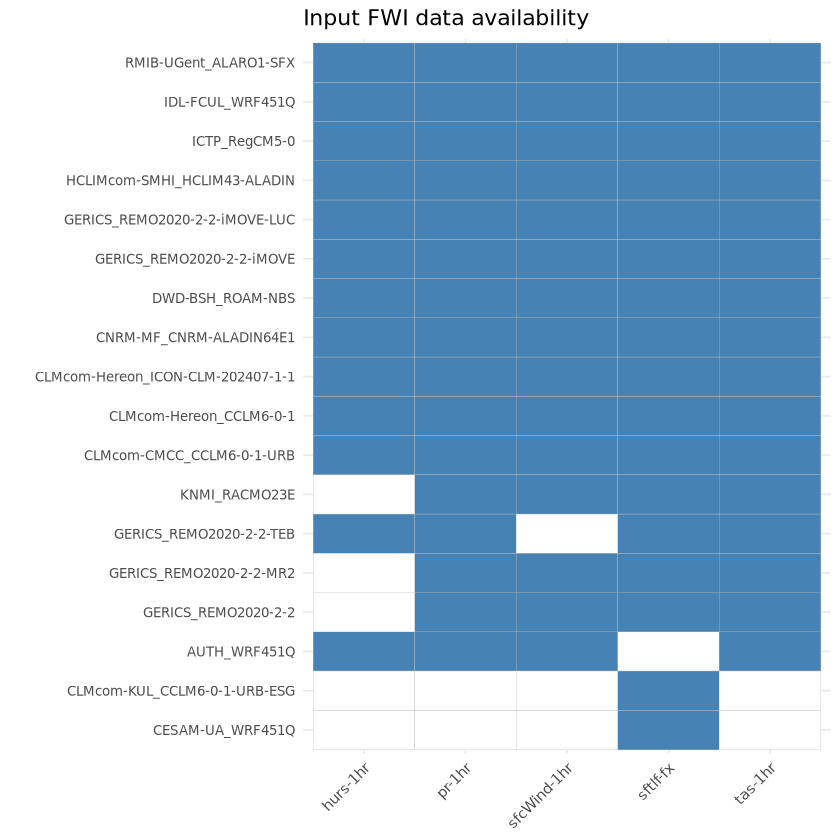

In [6]:
(models <- availableModels(do.plot = TRUE))

In [7]:
data.dir <- "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12//"

In [8]:
i=2

#for (i in 1:length(models)) {
    model <- models[i]

In [9]:
model

[1] "CLMcom-Hereon_CCLM6-0-1"

In [10]:
# Define a pattern that matches 1980 to 2020 (discard some model outputs starting earlier)
lf <- list.files(data.dir,
                 recursive = TRUE,
                 pattern = paste0("evaluation.*", model, "_.*1hr*(.*_198[0-9]|.*_199[0-9]|.*_200[0-9]|.*_201[0-9]|.*_2020)"),
                 full.names = TRUE) %>% grep("/pr_.*nc$", ., value = TRUE) 

In [11]:
lf

[1] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198001010030-198012312330.nc"
 [2] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198101010030-198112312330.nc"
 [3] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198201010030-198212312330.nc"
 [4] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198301010030-198312312330.nc"
 [5] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198401010030-198412312330.nc"
 [6] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198501010030-198512312330.nc"
 [7] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198601010030-198612312330.nc"
 [8] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198701010030-198712312330.nc"
 [9] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198801010030-198812312330.nc"
[10] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_198901010030-198912312330.nc"
[11] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199001010030-199012312330.nc"
[12] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199101010030-199112312330.nc"
[13] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199201010030-199212312330.nc"
[14] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199301010030-199312312330.nc"
[15] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199401010030-199412312330.nc"
[16] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6-0-1_v1-r1_1hr_199501010030-199512312330.nc"
[17] "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12///CLMcom-Hereon/ERA5/evaluation/r1i1p1f1/CCLM6-0-1/v1-r1/1hr/pr/v20230222/pr_EUR-12_ERA5_evaluation_r1i1p1f1_CLMcom-Hereon_CCLM6

In [12]:
 tp1 <- loadGridData(lf[1], var = "pr", dictionary = "../dictionary.dic", season = 2:6)

[2026-01-21 12:04:20.873323] Defining harmonization parameters for variable "pr"

[2026-01-21 12:04:21.674766] Defining geo-location parameters

[2026-01-21 12:04:21.809511] Defining time selection parameters

[2026-01-21 12:04:21.862785] Retrieving data subset ...

[2026-01-21 12:05:50.649696] Done



In [31]:
tp2 <- loadGridData(lf[1], var = "pr", dictionary = "../dictionary.dic", season = 7:11)

[2025-05-06 16:19:16.72946] Defining harmonization parameters for variable "pr"

[2025-05-06 16:19:16.741783] Defining geo-location parameters

[2025-05-06 16:19:16.824791] Defining time selection parameters

[2025-05-06 16:19:16.874449] Retrieving data subset ...

[2025-05-06 16:20:15.906322] Done



In [32]:
tp <- bindGrid(tp1, tp2, dimension = "time")

In [33]:
getRefDates(tp1) %>% range()
getRefDates(tp2) %>% range()
getRefDates(tp) %>% range()

[1] "1980-02-01 00:30:00 GMT" "1980-06-30 23:30:00 GMT"

[1] "1980-07-01 00:30:00 GMT" "1980-11-30 23:30:00 GMT"

[1] "1980-02-01 00:30:00 GMT" "1980-11-30 23:30:00 GMT"

In [34]:
getShape(tp1)
getShape(tp2)
getShape(tp)

time  lat  lon 
3624  412  424

time  lat  lon 
3672  412  424

time  lat  lon 
7296  412  424

In [ ]:
## Read just the 2 first files for testing purposes - summer JJA precip
lf <- lf[1:2]
season <- list(2:6, 7:11)
tp.list <- lapply(1:length(lf), function(j) {
    ds <- lf[j]
    message("[", Sys.time(), "] Processing data file ", j, " out of ", length(lf))
    ## Intermediate step: split data load in two periods to avoid memory
    aux <- lapply(1:length(season), function(x) {
                suppressMessages(
                    loadGridData(ds, var = "pr",
                                 dictionary = "../dictionary.dic",
                                 season = season[[x]])
                )
            }
    )
    tp <- do.call("bindGrid", c(aux, dimension= "time"))
    message("Performing accumulation 12-12")
    tpa <- accum_pr(tp) 
})

[2025-05-06 16:48:40.770703] Processing data file 1 out of 2

Performing accumulation 12-12

[2025-05-06 16:56:27.568259] Processing data file 2 out of 2



In [8]:
print(object.size(tp.list), units = "Mb")

318.5 Mb


Objects are too large... This result suggests that the best choice is performing accumulation on a file-by-file basis, and then aggregating

Just a check of how the time series of accumulated monthly precip (over the entire EUR12 domain) looks like:

In [9]:
test <- do.call("bindGrid", c(tp.list, dimension = "time"))

In [10]:
monthly.pr12 <- aggregateGrid(test, aggr.m = list("sum", na.rm = TRUE))

pad applied on the interval: day



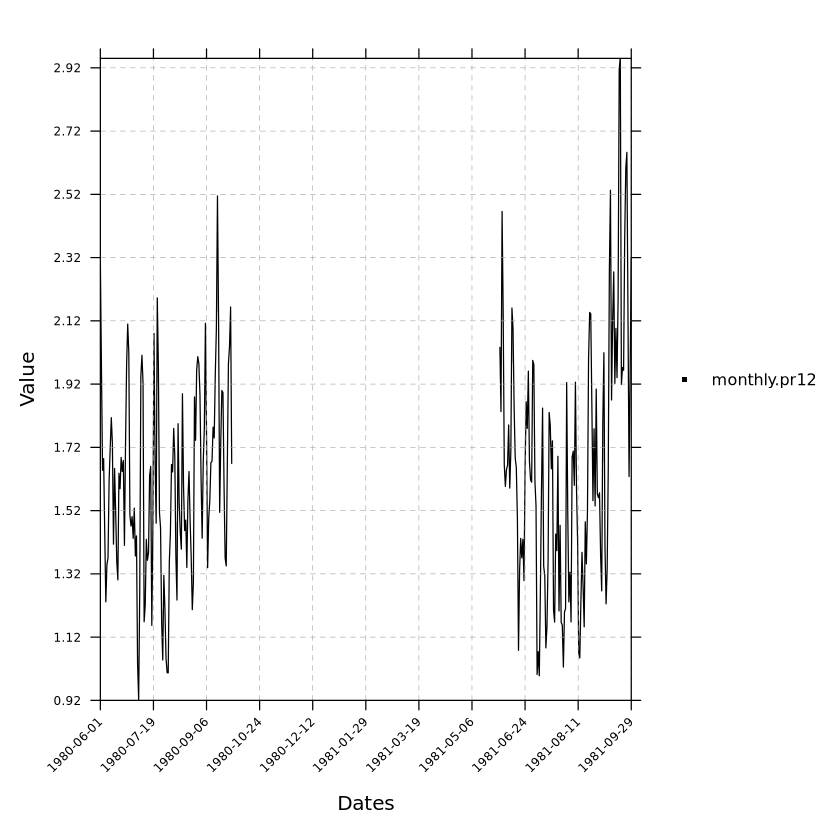

In [13]:
visualizeR::temporalPlot(monthly.pr12)

In [10]:
str(test)


List of 4
 $ Variable:List of 2
  ..$ varName: chr "pr"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi TRUE
  ..- attr(*, "description")= chr "Precipitation"
  ..- attr(*, "units")= chr "mm"
  ..- attr(*, "longname")= chr "total precipitation amount"
  ..- attr(*, "daily_agg_cellfun")= chr "sum"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "12:00 UTC"
 $ Data    : num [1:366, 1:406, 1:418] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 4
  ..$ x  : num [1:418] -28 -27.9 -27.8 -27.7 -27.6 ...
  ..$ y  : num [1:406] -23 -22.9 -22.8 -22.7 -22.6 ...
  ..$ lon: num [1:406, 1:418] -9.9 -9.95 -10 -10.04 -10.09 ...
  ..$ lat: num [1:406, 1:418] 22.4 22.5 22.6 22.7 22.8 ...
  ..- attr(*, "projection")= chr "RotatedPole"
  ..- attr(*, "grid_mapping_name")= chr "rotated_latitude_longitude"
  ..- attr(*, "grid_north_pole_latitude")= chr "39.25"
  ..- attr(*, "grid_north_pole_longitude")= c